In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import plot_tree
df = pd.read_csv(r'/Users/padmavathikadium/Downloads/diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


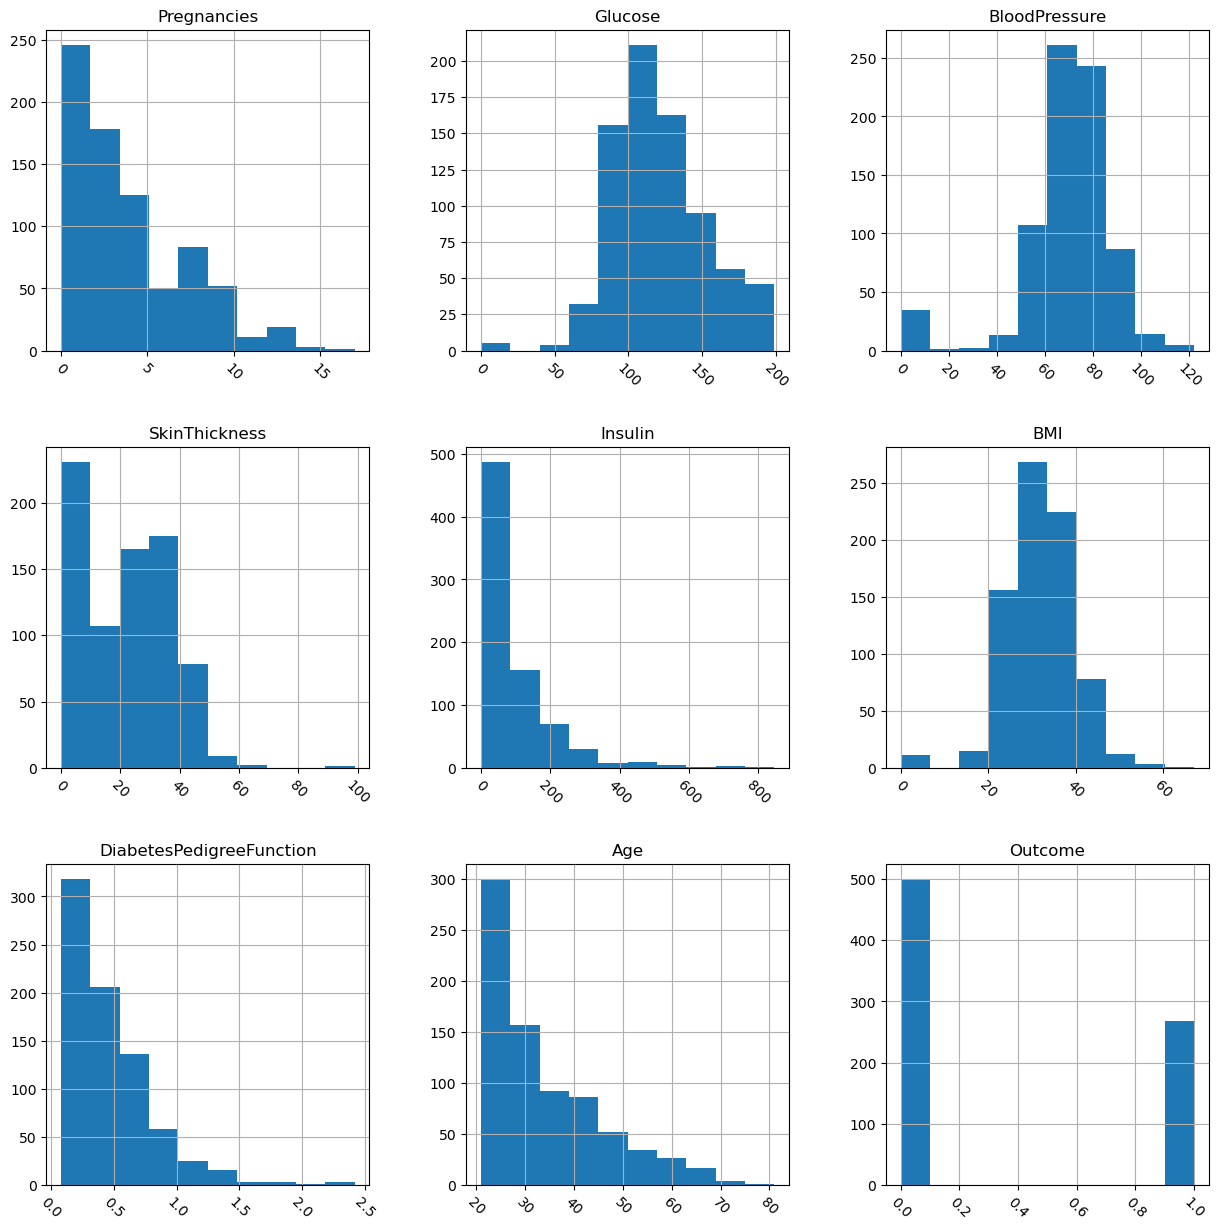

In [6]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [7]:
df = df.drop_duplicates()
print( df.shape )

(768, 9)


In [8]:
cols = df.columns

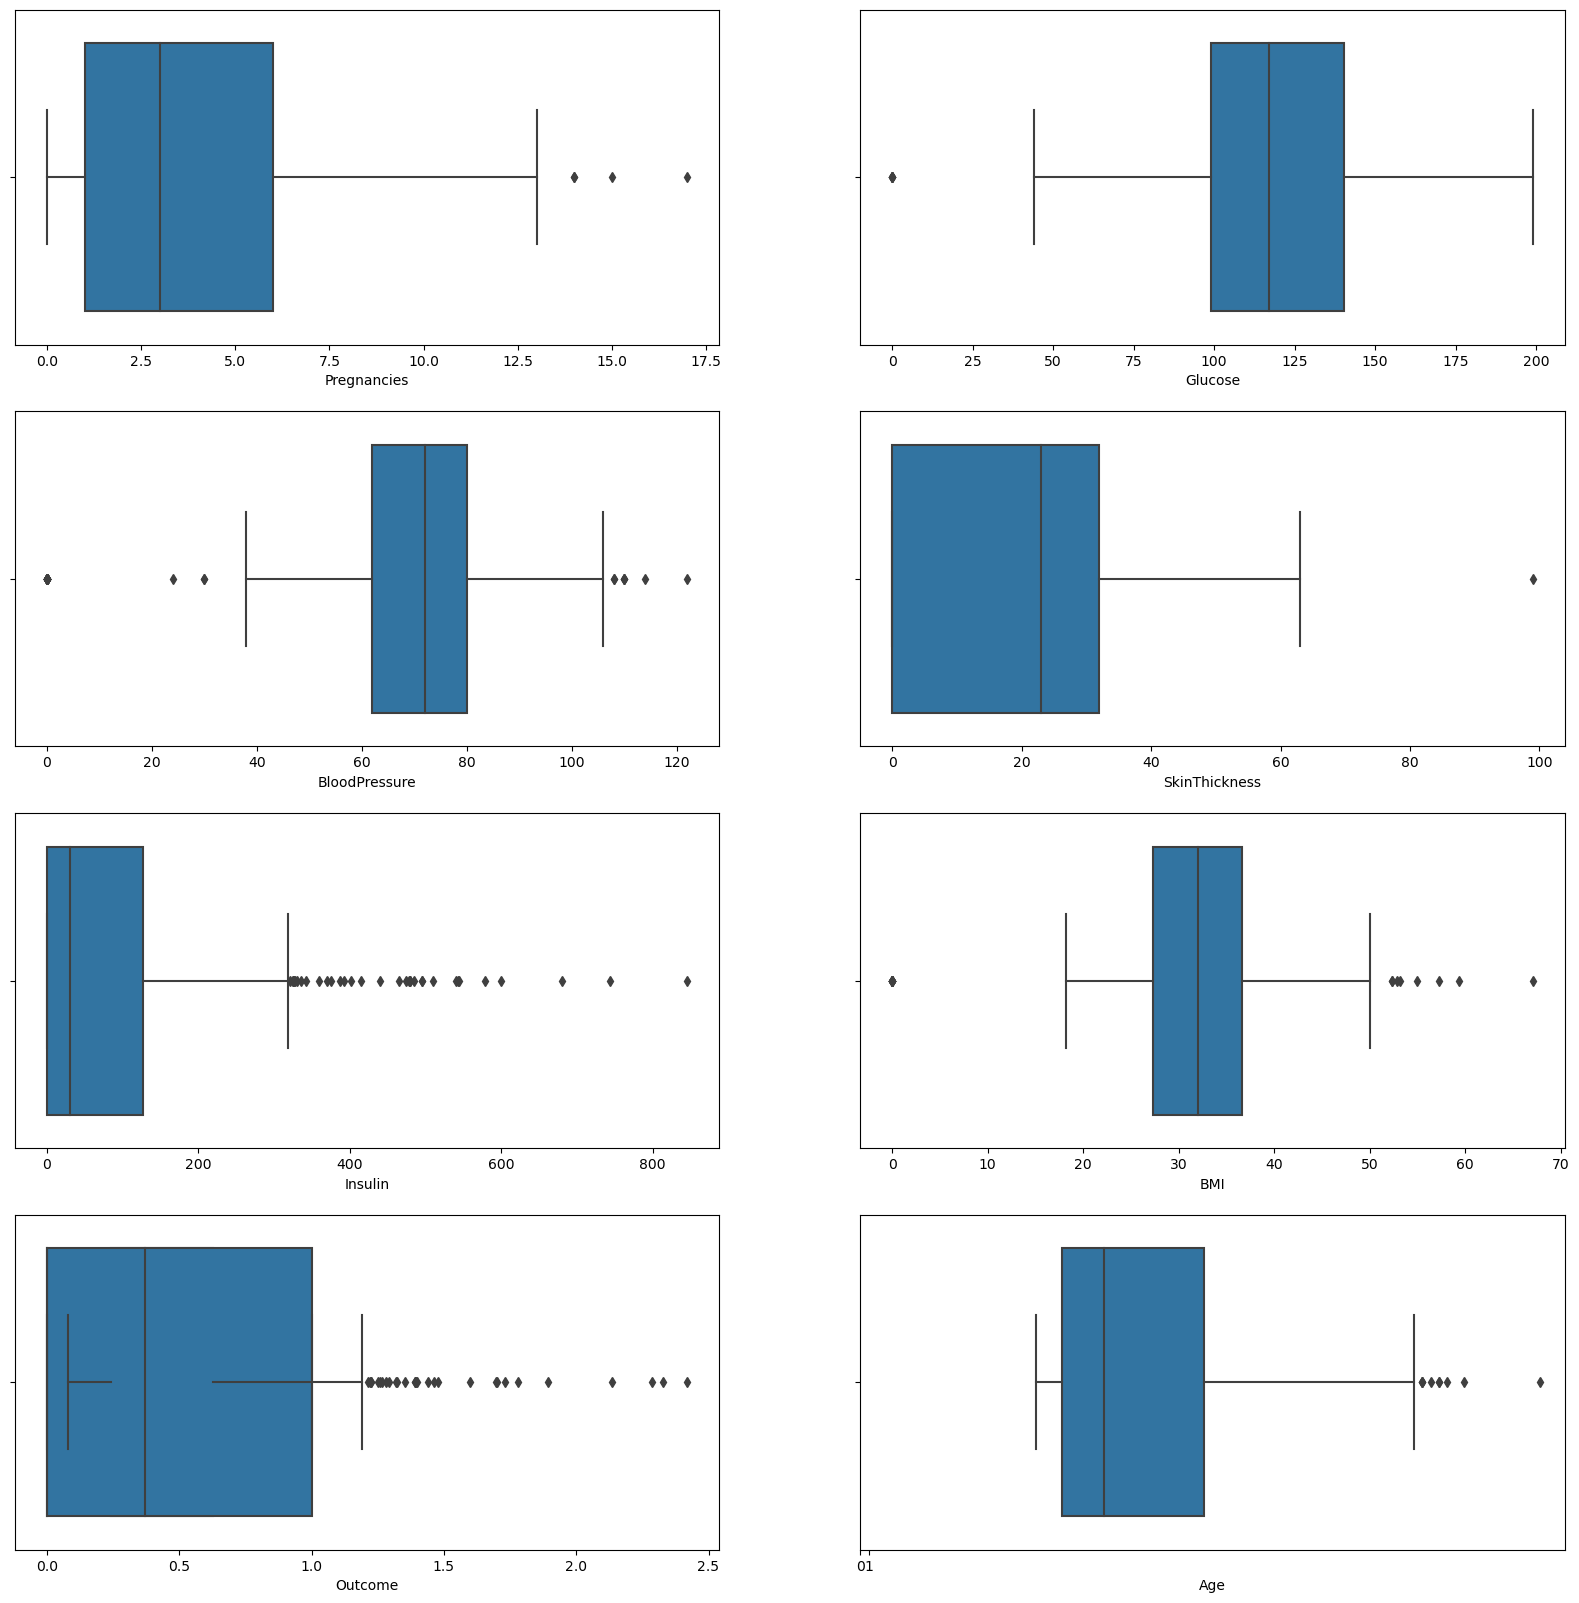

In [9]:
fig, axes = plt.subplots(4,2,figsize=(20,20))
i = 0
j = 0
for col in cols[:]:
    sns.boxplot(x=df[col],ax=axes[i][j])
    plt.xticks(ticks=df[col].unique())
    
    j = j + 1
    
    if j >= 2:
        j = 0
        if i < 3:
            i = i + 1

In [10]:
def detect_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    
    return df[column][(df[column] < (q1-1.5*IQR))|(df[column] > (q3 + 1.5*IQR))].tolist()

In [11]:
pregnancy_outliers = detect_outliers(cols[0])
glucose_outliers = detect_outliers(cols[1])
bp_outliers = detect_outliers(cols[2])
skinthickness_outliers = detect_outliers(cols[3])
insulin_outliers = detect_outliers(cols[4])
bmi_outliers = detect_outliers(cols[5])
DiabetesPidigreeFunction_outliers = detect_outliers(cols[6])
age_outliers = detect_outliers(cols[7])
outliers = [pregnancy_outliers,
           glucose_outliers,
            bp_outliers,
            skinthickness_outliers,
            insulin_outliers,
            bmi_outliers,
            DiabetesPidigreeFunction_outliers,
            age_outliers
           ]

In [12]:
def replace_outlier_with_mean(column,outliers):
    df[column] = np.where(df[column].isin(outliers),df[column].mean(),df[column])
    return df[column]

In [13]:
for i, col in enumerate(cols[:-1]):
    df[col] = replace_outlier_with_mean(col,outliers[i])

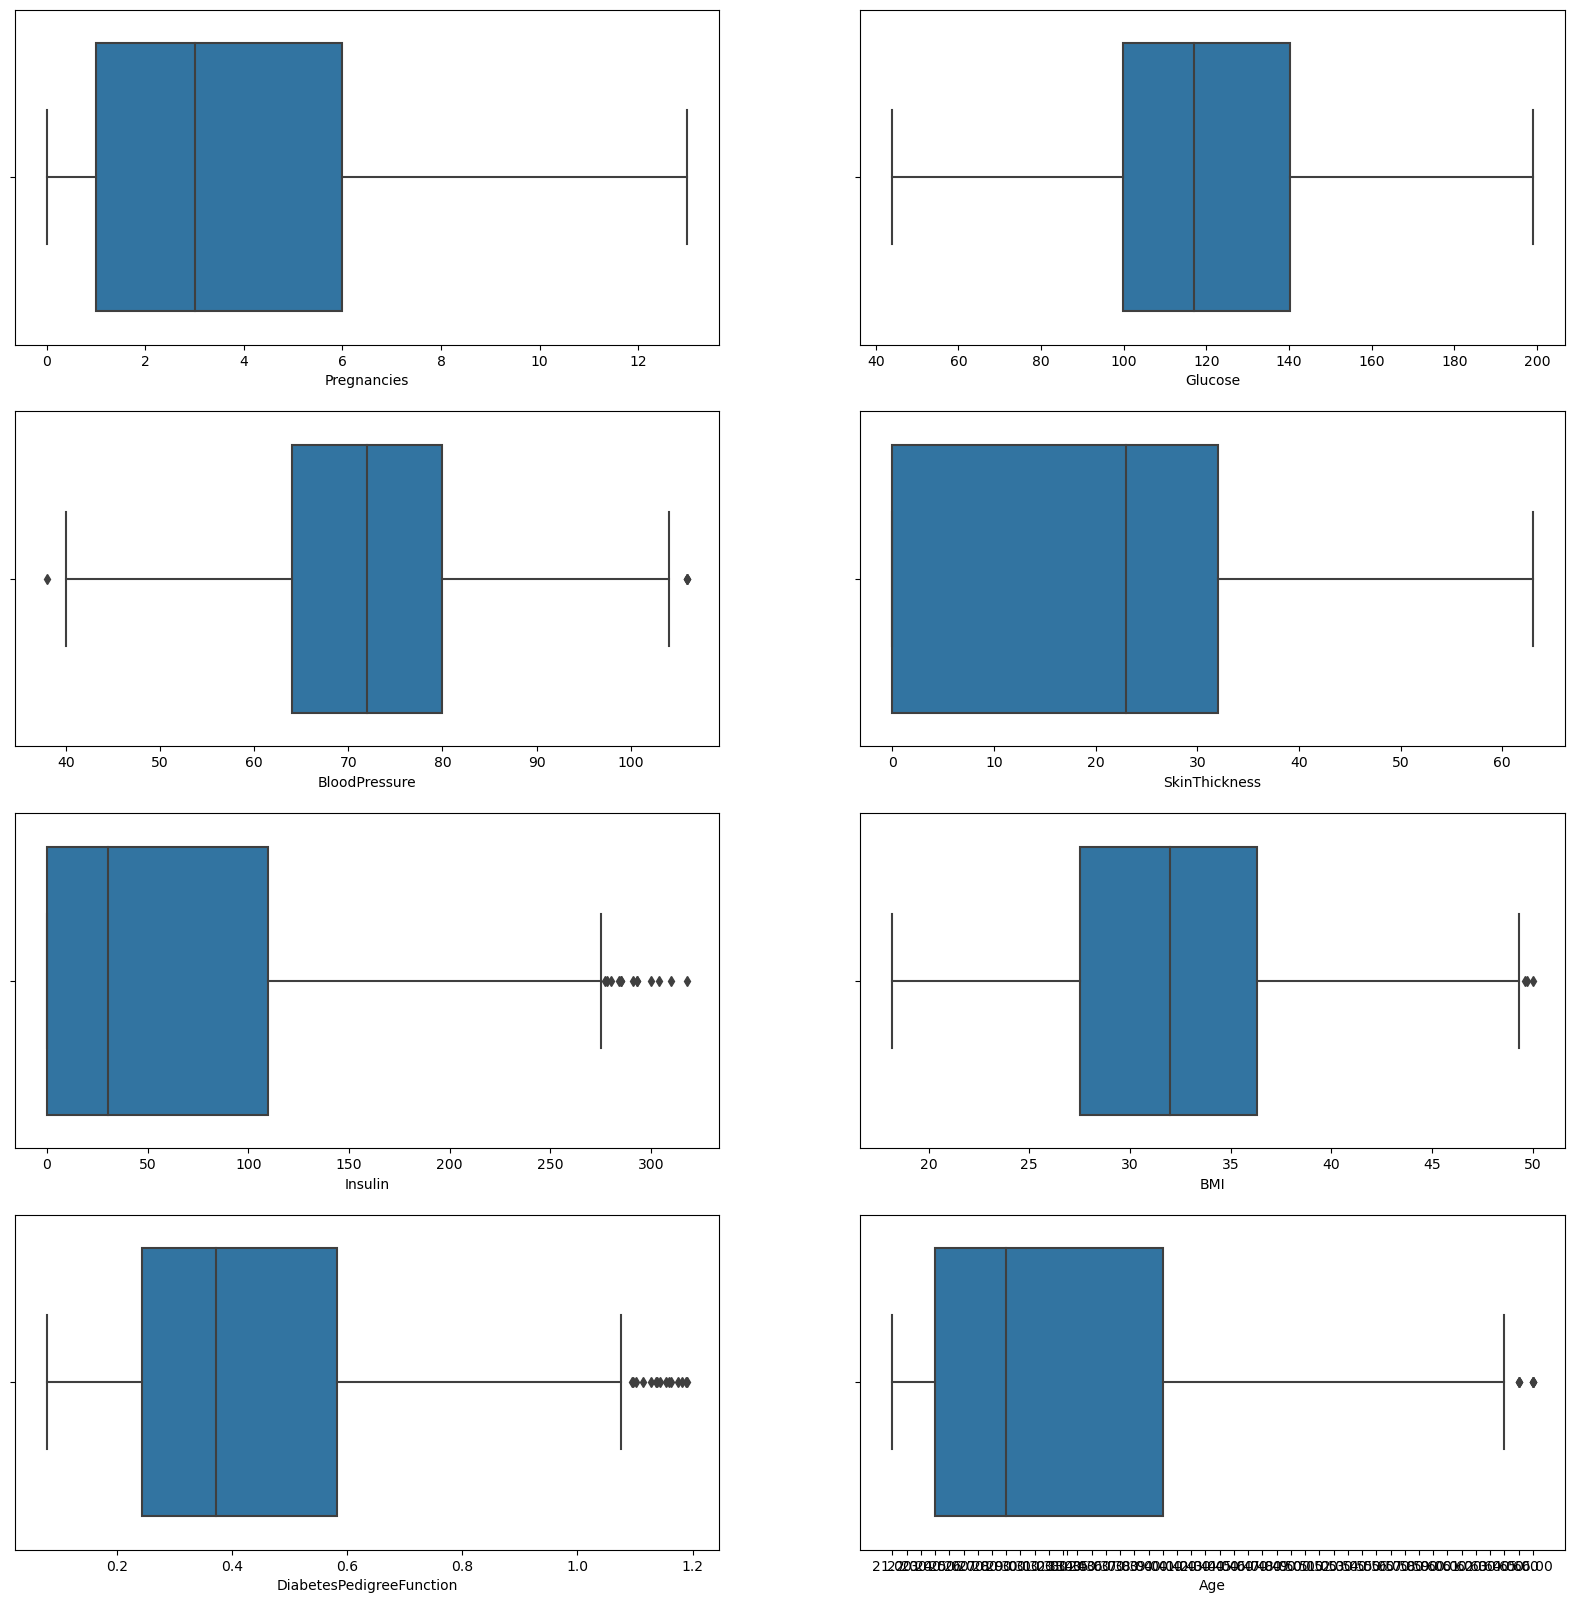

In [14]:
def make_figures():
    fig, axes = plt.subplots(4,2,figsize=(20,20))
    i = 0
    j = 0
    for col in cols[:-1]:
        sns.boxplot(x=df[col],ax=axes[i][j])
        plt.xticks(ticks=df[col].unique())
    
        j = j + 1
    
        if j >= 2:
            j = 0
            if i < 3:
                i = i + 1
        
        
make_figures()

In [15]:
df.isnull().values.any()

False

In [16]:
# Create separate object for target variable
y = df.Outcome

# Create separate object for input features
X = df.drop('Outcome', axis=1)

In [17]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.Outcome)

In [18]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [19]:
from sklearn.preprocessing import minmax_scale

In [20]:
X_train=minmax_scale(X_train)

In [21]:
X_test=minmax_scale(X_test)

In [22]:
X_train[:10]

array([[0.53846154, 0.65734266, 0.41176471, 0.66666667, 0.25094176,
        0.51886792, 0.57502246, 0.46666667],
       [0.29577324, 0.74825175, 0.5       , 0.65079365, 0.35849057,
        0.71383648, 0.66397125, 0.57777778],
       [0.38461538, 0.37062937, 0.54411765, 0.41269841, 0.        ,
        0.55974843, 0.42048518, 0.86666667],
       [0.46153846, 0.88811189, 0.82352941, 0.        , 0.        ,
        0.71069182, 0.35388706, 0.53333333],
       [0.61538462, 0.12587413, 0.47058824, 0.63492063, 0.15408805,
        0.53773585, 0.56334232, 0.4       ],
       [0.53846154, 0.56643357, 0.76470588, 0.65079365, 0.        ,
        0.43396226, 0.28122192, 0.4       ],
       [0.84615385, 0.32867133, 0.44117647, 0.63492063, 0.        ,
        0.88050314, 0.04312668, 0.46666667],
       [0.07692308, 0.30769231, 0.52941176, 0.19047619, 0.14465409,
        0.0408805 , 0.06379155, 0.15555556],
       [0.07692308, 0.28671329, 0.47058824, 0.23809524, 0.        ,
        0.        , 0.061994

In [23]:
X_test[:10]

array([[0.        , 0.61688312, 0.3       , 0.28333333, 0.69078947,
        0.09027778, 0.11603774, 0.        ],
       [0.15384615, 0.53896104, 0.03333333, 0.35      , 0.26249829,
        0.51736111, 0.08679245, 0.02325581],
       [0.        , 0.14935065, 0.53333333, 0.        , 0.        ,
        0.89583333, 0.10377358, 0.58139535],
       [0.        , 0.93506494, 0.63333333, 0.23333333, 0.60855263,
        0.43402778, 0.56415094, 0.02325581],
       [0.53846154, 0.75974026, 0.7       , 0.        , 0.        ,
        0.37847222, 0.07641509, 0.60465116],
       [0.92307692, 0.25974026, 0.46666667, 0.51666667, 0.        ,
        0.35416667, 0.2009434 , 0.58139535],
       [0.23076923, 0.77272727, 0.43333333, 0.3       , 0.34539474,
        0.42013889, 0.17358491, 0.1627907 ],
       [0.        , 0.48701299, 0.41842448, 0.        , 0.        ,
        0.44791667, 0.05377358, 0.06976744],
       [0.38461538, 0.51948052, 0.5       , 0.        , 0.        ,
        0.50347222, 0.128301

<AxesSubplot:>

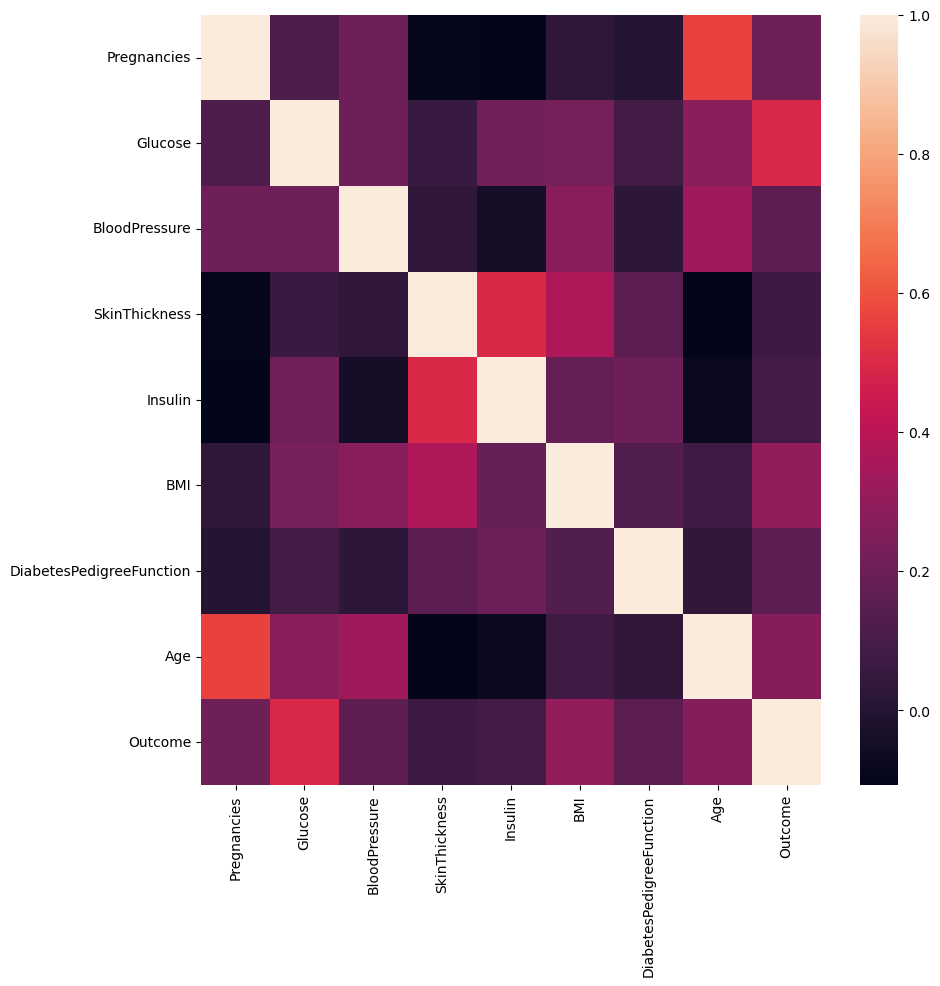

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())